In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function g

In [138]:
def g(h0, f, sx, px, sy, py, psi):
    """
    What the function does
    :param x: x = [px, py, psi]
    :return: measurement model g
    """
    
    h = (h0*f)/np.sqrt((sx-px)**2+(sy-py)**2)
    
    cx = f*np.tan(np.arctan((sy-py)/(sx-px))-psi)
    
    g_function = np.array([[h],[cx]])
    
    return g_function

In [139]:
def sec(phi):
    
    '''
    What the function does
    :param phi: 
    :return: 
    '''
    
    func = 1/np.cos(phi)
    
    return func

# Defining Jacobian G

In [140]:
def G(h0, sx, px, sy, py, psi):
    
    '''
    What the function does
    :param h0: 
    :param sx: 
    :param px: 
    :param sy: 
    :param py: 
    :param psi: 
    :return: 
    '''
    
    jacobian = np.zeros((2,3))
    
    # df1 / dpx
    jacobian[0][0] = (4 * h0 * (sx - px)) / (((sx - px) ** 2 + (sy - py) ** 2) ** (1 / 3))
    
    # df1 / dpy
    jacobian[0][1] = (4 * h0 * (sy - py)) / (((sx - px) ** 2 + (sy - py) ** 2) ** (1 / 3))
    
    # df1 / dpsi
    jacobian[0][2] = 0
    
    # df2 / dpx
    jacobian[1][0] = (np.tan(psi)) / ((sx - px) + (sy - py) * np.tan(psi)) + (sy - py - (sx - px) * np.tan(psi)) / ((sx - px + (sy - py) * np.tan(psi))**2)   
    
    # df2 / dpy
    jacobian[1][1] = - 1 / (sx - px + (sy - py) * np.tan(psi)) - ((sy - py - (sx - px) * np.tan(psi)) * np.tan(psi)) / ((sx - px + (sy - py) * np.tan(psi))**2)
    
    # df2 / dpsi
    jacobian[1][2] = (- (sx - px) * (sec(psi)) ** 2) / (sx - px + (sy - py) * np.tan(psi)) - ((sy - py - (sx - px) * np.tan(psi)) * (sy - py) * (sec(psi)) ** 2) / (sx - px + (sy - py) * np.tan(psi)) ** 2
    
    return jacobian



In [141]:
qr_df = pd.read_csv('../data/qr_code_position_in_global_coordinate.csv')
camera_df = pd.read_csv('../data/task5/camera_localization_task5.csv')

camera_columns = ['timestammp', 'qr_code', 'cx', 'cy', 'width', 'height', 'distance', 'attitude']

In [142]:
from sklearn import linear_model

path = "../data//task3//camera_module_calibration_task3.csv"
calibration_data = np.loadtxt(path, delimiter=',')
distances_cm = calibration_data[:,0]+1.7+5 #added Distance of camera pinhole and the IR detector and Distance of the wall and the wooden list
heights_px = calibration_data[:,1]

regr = linear_model.LinearRegression()
X = (1/heights_px).reshape(-1, 1)
regr.fit(X, distances_cm)
distances_cm_pred = regr.predict(X)

gradient = regr.coef_
bias = regr.intercept_

In [143]:
h0 = 11.5
f = gradient/h0

# Defining the measuremet function

In [144]:
y = g(h0, f, sx, px, sy, py, psi) + r

NameError: name 'sx' is not defined

# Gauss Newton with line search

In [ ]:
# Routine for Gauss Netwon with Line Search
 
# tuning parameter
iteration_end = 10 

# set x_0
x_0 = 0

R_inv = 0

N = 0

J_cost = 0

y = 0

h0 = 0


x_GN_LS = np.zeros((iteration_end,2)) #the path of the estimation
x_GN_LS[0,:] = x_0
N_gamma_grid = 1000
gamma_max = 50
gamma = np.arange(1,N_gamma_grid+1)*gamma_max/N_gamma_grid

for j in range(iteration_end-1):
    x_now = x_GN_LS[j,:]
    gj = g(x_now)
    Gj = G(x_now)
    Delta_x = np.linalg.solve((Gj.T @ R_inv @ Gj),Gj.T@ R_inv @ np.sum(y - gj , axis=0) / N)
    J_min = J_cost(y,x_now)
    gamma_min = 0

    for k in range(N_gamma_grid):
        J_prop = J_cost(y,x_now+gamma[k]*Delta_x)
        if J_prop < J_min:
            J_min = J_prop
            gamma_min = gamma[k]

    print('Gamma_min = {0:.3f}'.format(gamma_min))
    x_GN_LS[j+1,:] = x_now + gamma_min * Delta_x

SyntaxError: invalid syntax (1248178900.py, line 17)

## Task7

Avereage calibration speed: 0.0551
Angular velocity bias: -0.0621
Angular velocity variance: 0.6489


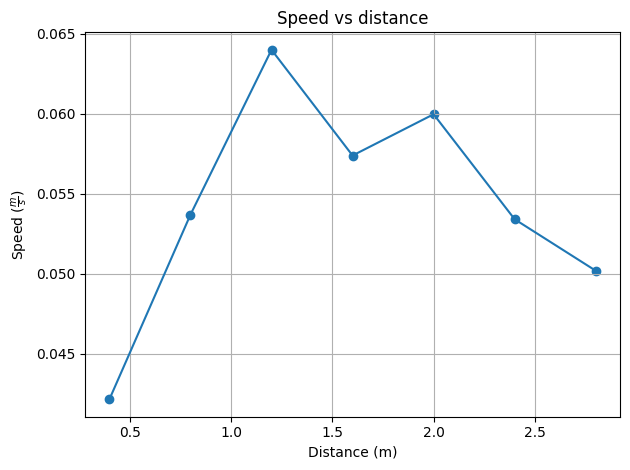

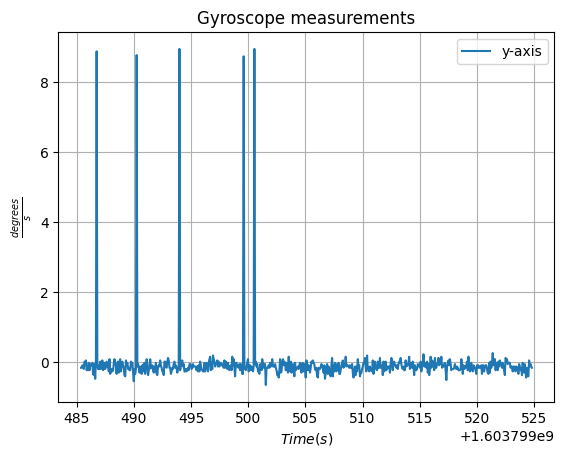

In [145]:
data_speed_calibration = np.loadtxt('../data/task4/robot_speed_task4.csv', delimiter=',', dtype='double')
distance_marks_cm = data_speed_calibration[:,0]/100 # to meters
t_n = data_speed_calibration[:,1]
speeds = np.zeros(len(t_n))
for i,tn in enumerate(t_n):
    if(i==0):
        speeds[i] = distance_marks_cm[i]/tn
    else:
        speeds[i] = (distance_marks_cm[i]-distance_marks_cm[i-1])/tn
plt.figure()
plt.plot( distance_marks_cm,speeds)
plt.scatter(distance_marks_cm,speeds)
plt.title("Speed vs distance")
plt.ylabel("Speed ($\\frac{m}{s})$")
plt.xlabel("Distance (m)")
plt.grid()
plt.tight_layout()
calibration_speed = np.round(np.mean(speeds[0:-1]),4)
print(f'Avereage calibration speed: {calibration_speed}')



IMU_data_calibration = np.loadtxt('../data/task1/imu_reading_task1.csv',delimiter=',',dtype='double')
gyro_time_calibration = IMU_data_calibration[:,0]
gyro_y_calibration = -IMU_data_calibration[:,6]
gyro_y_bias = np.round(np.mean(gyro_y_calibration),4)
gyro_y_var = np.round(np.var(gyro_y_calibration),4)
plt.figure()
plt.plot(gyro_time_calibration,gyro_y_calibration)
plt.title('Gyroscope measurements')
plt.xlabel('$Time (s)$')
plt.ylabel('$\\frac{degrees}{s}$')
plt.legend(['y-axis'])
plt.grid()
print(f'Angular velocity bias: {gyro_y_bias}')
print(f'Angular velocity variance: {gyro_y_var}')

In [146]:
motor_data = np.loadtxt('../data/task6-task7/motor_control_tracking_task6.csv', delimiter=',',dtype='float')
motor_time = motor_data[:,0]
motor_left = motor_data[:,1]
motor_right = motor_data[:,2]

IMU_data = np.loadtxt('../data/task6-task7/imu_tracking_task6.csv',delimiter=',',dtype='float')
gyro_time = IMU_data[:,0]
gyro_y = -IMU_data[:,6]
    
calibration_speed = calibration_speed*100/30 # task 3
robot_speed_estimates = (motor_left+motor_right)/2*calibration_speed

print(robot_speed_estimates)


[0.         0.         0.02755    0.02755    0.0551     0.0399475
 0.04408    0.0551     0.04408    0.04408    0.0551     0.0551
 0.0551     0.0551     0.0551     0.04408    0.0551     0.0551
 0.0551     0.0551     0.04408    0.04408    0.0551     0.0399475
 0.0399475  0.04408    0.04408    0.03099375 0.0399475  0.0399475
 0.0399475  0.0399475  0.0399475  0.0399475  0.04408    0.0399475
 0.03099375 0.04408    0.03099375 0.03099375 0.04408    0.03099375
 0.04408    0.04408    0.04408    0.04408    0.0551     0.04408
 0.04408    0.04408    0.04408    0.0551     0.04408    0.0551
 0.0551     0.04408    0.04408    0.0551     0.0551     0.0551
 0.0551     0.02755    0.0551     0.0551     0.0399475  0.0399475
 0.0399475  0.0399475  0.0399475  0.03099375 0.04408    0.03099375
 0.04408    0.03099375 0.04408    0.04408    0.03099375 0.04408
 0.03099375 0.03099375 0.04408    0.03099375 0.0399475  0.04408
 0.04408    0.0399475  0.04408    0.04408    0.04408    0.0551
 0.04408    0.04408    0.0551

In [147]:
f_robot = lambda x,u: np.array( [u[0]*np.cos(x[2]), 
                                 u[0]*np.sin(x[2]), 
                                 u[1]] )
def Euler_method(func, u, x0, T):
    x = np.zeros((len(T),3))
    x[0] = x0
    for n in range(1, len(T)):
        dt = T[n] - T[n-1]
        x[n,:] = x[n-1,:] + func(x[n-1,:], u[n-1,:]) * dt
    return x
def robot_jacobian(x, u):
    jac = np.array([ [0, 0,  -u[0] * np.sin(x[2])], 
                     [0, 0,  u[0] * np.cos(x[2])], 
                     [0, 0,  0] ])
    return jac
def linearization_solution(f, jac, t, x0, u):
    x = np.zeros((t.shape[0],x0.shape[0]))
    I = np.eye(x0.shape[0])
    x[0] = x0
    for i in range(x.shape[0]-1):
        dt = t[i] - t[i-1]
        A = jac(x[i],u[i])
        F = (I + 0.5*A*dt + A@A*dt*dt/2) * dt  # this is an approximation
        x[i+1] = x[i] + F @ f(x[i],u[i]) 
    return x

(2509, 2)
[[ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 ...
 [ 0.0551  -0.32837]
 [ 0.       0.     ]
 [ 0.       0.     ]]


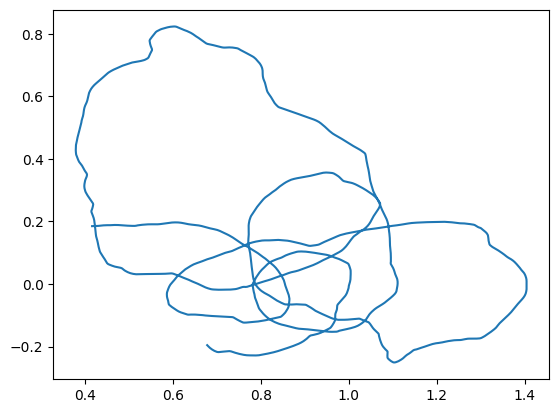

In [149]:
# k = 0
# u_robot = np.zeros((gyro_y.shape[0],2))
# for i, speed in enumerate(robot_speed_estimates):

#     motor_timestamp = motor_time[i]
#     avg_ang_velocity = 0
#     for j, ang_velocity in enumerate(gyro_y[k:-1]):
#         gyro_timestamp = gyro_time[j]
#         if(gyro_timestamp>motor_timestamp or j == (len(gyro_y[k:-1])-1)):
#             avg_ang_velocity = np.mean(gyro_y[k:k+j])
#             k = j
#             break
#     u_robot[i,0] = speed
#     u_robot[i,1] = avg_ang_velocity-gyro_y_bias
#     if (k >= (len(gyro_y)-1)):
#         break
# x_robot_0 = [0.417,0.185,0]
# dead_reckoning = Euler_method(f_robot, u_robot, x_robot_0, motor_time)
# plt.figure()
# plt.plot(dead_reckoning[:,0],dead_reckoning[:,1])
k = 0
u_robot = np.zeros((gyro_y.shape[0],2))
print(u_robot.shape)
for i, speed in enumerate(robot_speed_estimates):

    motor_timestamp = motor_time[i]
    for j, ang_velocity in enumerate(gyro_y[k:-1]):
        gyro_timestamp = gyro_time[j]
        if(gyro_timestamp>motor_timestamp or j == (len(gyro_y[k:-1])-1)):
            k = j
            break

        u_robot[k+j,0] = speed
        u_robot[k+j,1] = ang_velocity if speed>0 else 0
    if (k >= (len(gyro_y)-1)):
        break
x_robot_0 = np.array([0.417,0.185,0])
print(u_robot)
dead_reckoning = Euler_method(f_robot, u_robot, x_robot_0, gyro_time)
x_linear = linearization_solution(f_robot,
                                  robot_jacobian, 
                                  gyro_time, 
                                  x_robot_0, 
                                  u_robot)
plt.figure()
# plt.plot(dead_reckoning[:,0],dead_reckoning[:,1])
plt.plot(x_linear[:,0],x_linear[:,1])